---
  ## **a) Integrantes del equipo**:🎓​
  ---


| Integrantes   | No. de cuenta    |
|----------|------|
| Bohórquez Nuño Ana Elizabeth        | 422101862     |
| Cervantes Vasconcelos María Fernanda| 318711827    |
| Hernandez Vargas Hector | 422020053|
| Lugo Salazar María Inés     | 422088480 |
|Morales Ramirez Angel Francisco |422093653|
| Tienda Tienda Sebastian | 319035090 |
|Zuñiga Galván Diego Antonio | 422106104 |

---
# **Indicaciones**:👨‍🏫
---


############################
## TERCERA TAREA EN EQUIPO ###
############################

Para esta su tercera tarea en equipo deberán realizar el análisis exploratorio del set de datos visto en clase (tema 8, Regresión Logística: ds_04032021.csv) así como la ejecución de un modelo de regresión logística. Los resultados obtenidos de esta ejecución los deberán repetir para un set de datos que deberán buscar en Kaggle o en la Universidad de California y que previamente a la ejecución del modelo de regresión logística deberán describir en un análisis exploratorio, es decir explicar su variable objetivo y porque creen que su modelo tiene sustento metodológico. Su Colab deberá contener lo siguiente:

a. Encabezado con el nombre de los integrantes

b. Ejecución del análisis de regresión y estadísticos ROC y matriz de confusiñon del dataset visto en clase

c. Descripción del set de datos que escogieron de Kaggle o de la Universidad de California

d. Definición de la variable objetivo (variable Y)

e. Definición no tan exhaustiva de los features del set de datos (variables X)

f. Análisis exploratorio de los datos donde se revise la relación entre features y la relación con la variable objetivo (tablas, gráficas con formatos diferentes a los presentados por default en Python). Para esto, se pueden apoyar del tema 8 y el análisis bivariado estudiado en el tema.

g. Explicación de la metodología seguida para la selección de variables explicativas que formarán parte del modelo final, es decir si utilizan el análisis de correlación, variance inflation factor o varclus para escoger sus análisis tendrán que mostrar la evidencia y explicación de su procedimiento y justificarlo.

h. Tabla de resultados del modelo(s) construido(s) con la
interpretación de los resultados de la regresión así como de los elementos de la tabla de summary(). Es decir, si desean comparar dos modelos con distintas variables deberán mostrar el análisis de desempeño de ambos modelos (ver siguiente sección para mayor detalle del performance del modelo).

i. Realizar el análisis de performance del modelo, para ellos deberán mostrar además del summary de la técnica de regresión, el análisis métricas del modelo (precisión, recall, f1 score, etc.), matriz de confusión y curva roc. Para esto se pueden apoyar de los códigos del tema 8.

j. Realizar una revisión profunda de si su modelo cumple con los supuestos de la regresión vistos en clase (Nota: recuerden que en la regresión logística los MCO se corren sobre los logit)

k. Generar algunas Hipótesis de porque el set de datos pudiera requerir de un tratamiento posterior para cumplir con los supuestos de la regresión

El documento se entrega en google Colab, el archivo y los datos deberán estar compartidos, les recomiendo hagan pruebas antes de compartirme su Colab.

El Colab lo deberán compartir en este canal repondiendo a este canal conversacional y ustedes serán los responsables por la seguridad de su documento.

Para los que decidan usar R dentro de Colab deberán describir cada función de regresión que requieran utilizar y asegurarse que se puedan ejecutar en su Colab, mismo caso si no utilizan las librerías de sklearn o statmodels de Python.

Nota: no es necesario comparar técnicas de machine learning para esta tarea.

Los criterios de evaluación son:

a. Originalidad en la presentación del dataset

b. Dominio en el conocimiento del dataset

c. Originalidad en la presentación de resultados (formatos de las tablas y gráficas)

d. Profundidad en las Hipótesis planteadas

e. Grado de dominio de los conceptos de regresión logística

El tiempo para entregar esta su tercera tarea será el Lunes 28 de Abril del presente.

---
#**b) Análisis para el datset visto en clase**:🗃️
---

In [1]:
#Importamos la libreria pd
#Para trabajar los datos con dataframes
import pandas as pd
#Importamos la libreria numpy
#Para hacer cálculos matemáticos
import numpy as np
#Importamos la libreria seaborn
#Para hacer gráficos
import seaborn as sns
#Importamos la libreria matplotlib
#Para hacer gráficos
import matplotlib.pyplot as plt
#Importamos la libreria statsmodels
#para hacer regresión logística
import statsmodels as sm
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Modelo de regresión logística
from sklearn.linear_model import LogisticRegression
#Calcular curva ROC
from sklearn.metrics import roc_curve

##Datos

---
#**c) Descripción del set de datos**:📋
---

In [2]:
#Ponemos la dirrección del repositorio con los datos
url_datos = ('https://raw.githubusercontent.com/FranciscoMoralesActuary/An-lisis-de-Regresi-n-Tarea-No-3/main/car_insurance_claim.csv')
#Leemos el archivo con la función de Pandas pd.read
df = pd.read_csv(url_datos)

In [3]:
#Mostramos los datos
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [4]:
#Verificamos las dimensiones de los datos
df.shape

(10302, 27)

In [5]:
#Observamos la cantidad de registros nulos que hay en el DataFrame
df.isnull().sum()

,0
ID,0
KIDSDRIV,0
BIRTH,0
AGE,7
HOMEKIDS,0
YOJ,548
INCOME,570
PARENT1,0
HOME_VAL,575
MSTATUS,0


In [6]:
#Mostramos la infomación de las columas datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

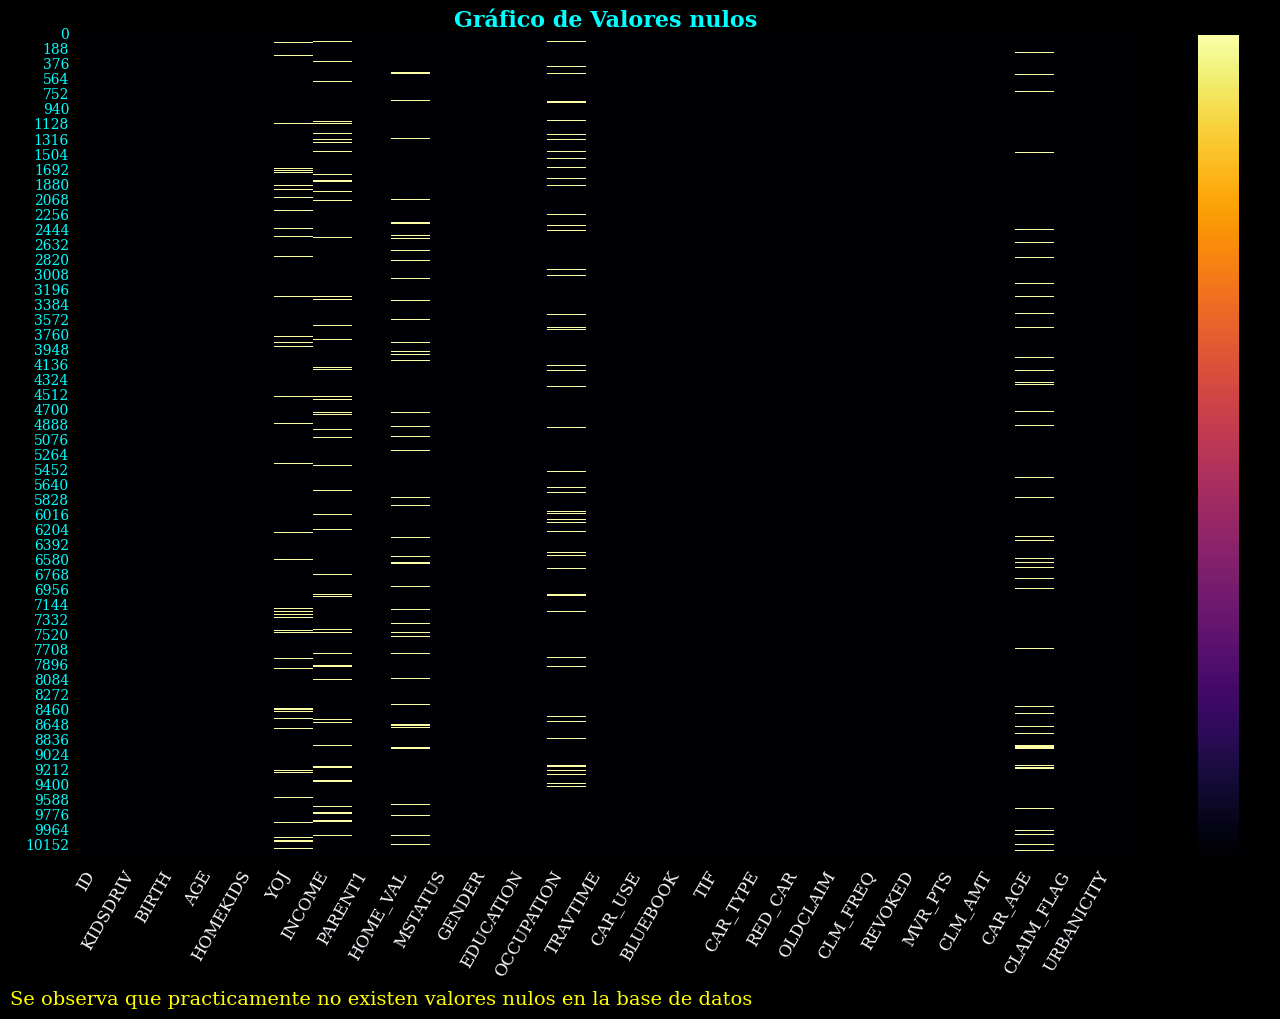

In [7]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,10), facecolor = 'black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df.isnull(), cmap = 'inferno')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color ='cyan', fontweight = 'bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',rotation=60, ha='right')
plt.yticks(fontsize=10, color='cyan')
#Agregamos la interpretacion de la grafica
plt.figtext(0, -0.01, "Se observa que practicamente no existen valores nulos en la base de datos",
            fontsize = 14, color='yellow')
#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [8]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
columnas_con_nulos

['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'OCCUPATION', 'CAR_AGE']

In [9]:
# Cuenta la cantidad de personas que sufrieron un siniestro (1) y las que no sufrieron un siniestro (0)
df['CLAIM_FLAG'].value_counts()

,count
CLAIM_FLAG,
0,7556
1,2746


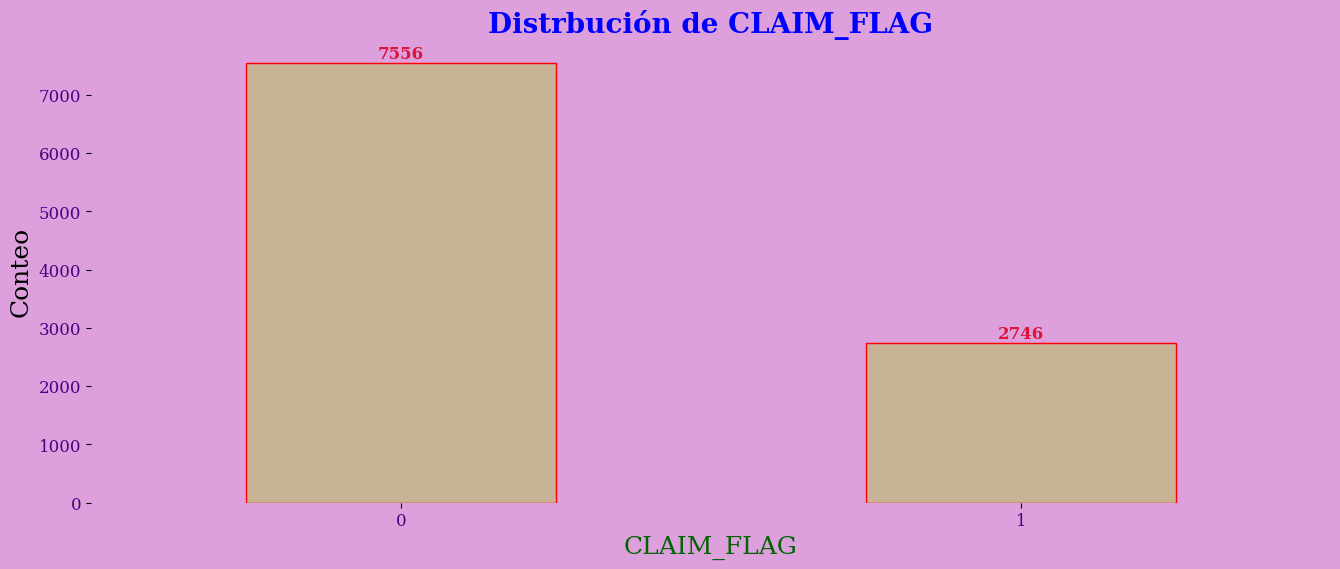

In [10]:
# Creamos el gráfico con tamaño
plt.figure(figsize=(16,6), facecolor="plum")
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Datos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
#Width-->Barras mas delgada
grafica=sns.countplot(x='CLAIM_FLAG',data=df,color="tan",edgecolor='red',width=0.5)
# Agregamos etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('CLAIM_FLAG',fontsize = 18, color = 'darkgreen')
# Agregamos etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Conteo',fontsize = 18, color = 'black')
#Agregamos las etiquetas de los valores del eje x & y
plt.xticks(fontsize=12, color='indigo')
plt.yticks(fontsize=12, color='indigo')
#Agregamos el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de CLAIM_FLAG',fontsize = 20,color = 'blue',fontweight='bold')
#Ponemos etiquetas para escribir los reclamos exactos en el gráfico
#container-->Almacena el valor de cada variables x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12, color='crimson',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("plum")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostramos el gráfico
plt.show()

In [11]:
df_entrenamiento = df.copy()

---
#**d) Definición de la variable objetivo (Variable Y)**:
---

In [12]:
#Variable Target
Y = df_entrenamiento['CLAIM_FLAG']
Y

,CLAIM_FLAG
0,0
1,0
2,0
3,0
4,0
...,...
10297,0
10298,0
10299,0
10300,0


El evento que buscamos predecir es la probabilidad de que un auto sufra un siniestro, tiene una respuesta binaria (Si o no)

$$
y= \begin{cases} 1 \ \text{Si el auto sufrio un siniestro} \\
   0 \ \text{Si el auto no sufrio un siniestro}
  \end{cases}
$$

In [13]:
#Borramos variables no significativas
df_entrenamiento.drop(['ID','BIRTH'], axis=1, inplace=True)

---
#**e) Definición no tan exhaustiva de los features del set de datos (variables X)** 🔢
---


| Variable                  | Definición | ¿Por qué es relevante? |
|----------------------------|------------|-------------------------|
| **KIDSDRIV**               | Número de hijos que conducen. | Puede indicar mayor exposición al riesgo si hay múltiples conductores jóvenes. |
| **AGE**                    | Edad del asegurado. | La edad influye directamente en la propensión a accidentes. |
| **HOMEKIDS**               | Número de hijos viviendo en casa. | Perfil familiar; podría correlacionarse con hábitos de conducción. |
| **YOJ**                    | Años en el empleo actual. | Estabilidad laboral asociada a menor riesgo financiero y de accidentes. |
| **TRAVTIME**               | Tiempo de traslado diario en minutos. | Más exposición diaria puede aumentar el riesgo. |
| **TIF**                    | Tiempo como cliente de la aseguradora. | Clientes leales suelen tener un comportamiento de riesgo más predecible. |
| **CLM_FREQ**               | Número de reclamaciones anteriores. | Historial de siniestros es un predictor fuerte de futuros eventos. |
| **MVR_PTS**                | Puntos de infracciones de tránsito. | Indica historial de conducción riesgosa. |
| **CAR_AGE**                | Edad del vehículo. | Autos más viejos pueden tener menos medidas de seguridad. |
| **CLAIM_FLAG**             | Si presentó o no un reclamo (objetivo). | Es la variable que buscamos predecir en el modelo. |
| **PARENT1_Yes**            | Si es padre o madre. | Puede asociarse a comportamientos más cautelosos, aunque su impacto suele ser bajo. |
| **MSTATUS_z_No**           | Estado civil (no casado). | Su efecto en riesgo es bajo frente a edad, ocupación y educación. |
| **GENDER_z_F**             | Género femenino. | Puede tener impacto moderado en patrones de manejo, pero suele ser débil. |
| **EDUCATION_Bachelors**    | Educación: licenciatura. | Educación puede correlacionarse con mejores hábitos de conducción. |
| **EDUCATION_Masters**      | Educación: maestría. | Similar a licenciatura, asociado a perfil socioeconómico más alto. |
| **EDUCATION_PhD**          | Educación: doctorado. | Perfil académico elevado; posible relación con manejo más prudente. |
| **EDUCATION_z_High School**| Educación: preparatoria o menor. | Perfil socioeconómico distinto que puede influir en el tipo de vehículo y exposición. |
| **OCCUPATION_Doctor**      | Ocupación: médico. | Profesionales especializados, posible menor riesgo. |
| **OCCUPATION_Home Maker**  | Ocupación: ama/o de casa. | Uso vehicular reducido, pero pocos registros lo hacen poco significativo. |
| **OCCUPATION_Lawyer**      | Ocupación: abogado/a. | Profesiones de alto estrés; posibles patrones distintos de movilidad. |
| **OCCUPATION_Manager**     | Ocupación: gerente. | Nivel gerencial ligado a diferente uso de vehículos y perfil de riesgo. |
| **OCCUPATION_Professional**| Ocupación: profesional especializado. | Perfil socioeconómico medio-alto. |
| **OCCUPATION_Student**     | Ocupación: estudiante. | Perfil joven, tradicionalmente asociado a mayor siniestralidad. |
| **OCCUPATION_z_Blue Collar**| Ocupación: trabajo manual. | Trabajo operativo puede implicar distintos patrones de manejo. |
| **CAR_USE_Private**        | Uso del vehículo privado o comercial. | El uso privado generalmente implica diferente exposición al riesgo. |
| **CAR_TYPE_Panel Truck**   | Tipo de vehículo: Panel Truck. | Vehículo comercial pequeño; diferente patrón de uso. |
| **CAR_TYPE_Pickup**        | Tipo de vehículo: Pickup. | Vehículo de carga liviana; puede tener patrones de manejo diferentes. |
| **CAR_TYPE_Sports Car**    | Tipo de vehículo: deportivo. | Asociado a velocidad más alta y mayor riesgo. |
| **CAR_TYPE_Van**           | Tipo de vehículo: Van. | Vehículo familiar; patrones de siniestralidad particulares. |
| **CAR_TYPE_z_SUV**         | Tipo de vehículo: SUV. | SUV percibidos como más seguros pero con impacto en la severidad de accidentes. |
| **RED_CAR_yes**            | El auto es de color rojo. | Creencia cultural sobre mayor riesgo, aunque evidencia débil. |
| **REVOKED_Yes**            | Licencia revocada. | Fuerte indicador de historial de conducción riesgosa. |
| **URBANICITY_z_Highly Rural/ Rural** | Zona de residencia: rural. | Diferente exposición y tipos de riesgo comparado con áreas urbanas. |


---
#**f) Análisis exploratorio**🛠️
---

In [14]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   AGE         10295 non-null  float64
 2   HOMEKIDS    10302 non-null  int64  
 3   YOJ         9754 non-null   float64
 4   INCOME      9732 non-null   object 
 5   PARENT1     10302 non-null  object 
 6   HOME_VAL    9727 non-null   object 
 7   MSTATUS     10302 non-null  object 
 8   GENDER      10302 non-null  object 
 9   EDUCATION   10302 non-null  object 
 10  OCCUPATION  9637 non-null   object 
 11  TRAVTIME    10302 non-null  int64  
 12  CAR_USE     10302 non-null  object 
 13  BLUEBOOK    10302 non-null  object 
 14  TIF         10302 non-null  int64  
 15  CAR_TYPE    10302 non-null  object 
 16  RED_CAR     10302 non-null  object 
 17  OLDCLAIM    10302 non-null  object 
 18  CLM_FREQ    10302 non-null  int64  
 19  REVOKED     10302 non-nul

---
## **Conversión a variables númericas** 🔢
---

In [15]:
df_entrenamiento = pd.get_dummies(df_entrenamiento,
                                  columns = ['PARENT1',
                                            'MSTATUS',
                                            'GENDER',
                                            'EDUCATION',
                                            'OCCUPATION',
                                            'CAR_USE',
                                            'CAR_TYPE',
                                            'RED_CAR',
                                            'REVOKED',
                                            'URBANICITY'],
                                  drop_first = True)

In [16]:
#Reemplazamos los valores de False por 0 y de True por 1
df_entrenamiento = df_entrenamiento.replace({False: 0, True: 1})

<ipython-input-16-ace71f993de3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_entrenamiento = df_entrenamiento.replace({False: 0, True: 1})


In [17]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10302 non-null  int64  
 1   AGE                               10295 non-null  float64
 2   HOMEKIDS                          10302 non-null  int64  
 3   YOJ                               9754 non-null   float64
 4   INCOME                            9732 non-null   object 
 5   HOME_VAL                          9727 non-null   object 
 6   TRAVTIME                          10302 non-null  int64  
 7   BLUEBOOK                          10302 non-null  object 
 8   TIF                               10302 non-null  int64  
 9   OLDCLAIM                          10302 non-null  object 
 10  CLM_FREQ                          10302 non-null  int64  
 11  MVR_PTS                           10302 non-null  int64  
 12  CLM_

In [18]:
variables_objetos= df_entrenamiento.select_dtypes(include=['object']).columns.tolist()
variables_objetos

['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

In [19]:
#Eliminamos el signo de pesos que aparece al inicio
df_entrenamiento['INCOME'] = df_entrenamiento['INCOME'].replace({'\$': '', ',': ''}, regex=True)

In [20]:
# Convertir los valores de las variables numéricas a tipo numérico si no lo son
# El argumento 'errors="coerce"' convierte valores no válidos como texto, nulos, etc. en NaN, para así asegurar que las columnas sean consistentes
for i in variables_objetos:
  df_entrenamiento[i] = df_entrenamiento[i].replace({'\$': '', ',': ''}, regex=True)
  df_entrenamiento[i] = pd.to_numeric(df_entrenamiento[i], errors='coerce')

In [21]:
df_entrenamiento.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,...,OCCUPATION_z_Blue Collar,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0,60.0,0,11.0,67349.0,0.0,14,14230,11,4461,...,0,1,0,0,0,0,0,1,0,0
1,0,43.0,0,11.0,91449.0,257252.0,22,14940,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,48.0,0,11.0,52881.0,0.0,26,21970,1,0,...,0,1,0,0,0,1,0,1,0,0
3,0,35.0,1,10.0,16039.0,124191.0,5,4010,4,38690,...,0,1,0,0,0,0,1,0,0,0
4,0,51.0,0,14.0,NaN,306251.0,32,15440,7,0,...,1,1,0,0,0,0,0,1,0,0


In [22]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10302 non-null  int64  
 1   AGE                               10295 non-null  float64
 2   HOMEKIDS                          10302 non-null  int64  
 3   YOJ                               9754 non-null   float64
 4   INCOME                            9732 non-null   float64
 5   HOME_VAL                          9727 non-null   float64
 6   TRAVTIME                          10302 non-null  int64  
 7   BLUEBOOK                          10302 non-null  int64  
 8   TIF                               10302 non-null  int64  
 9   OLDCLAIM                          10302 non-null  int64  
 10  CLM_FREQ                          10302 non-null  int64  
 11  MVR_PTS                           10302 non-null  int64  
 12  CLM_

In [23]:

df_entrenamiento.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,...,OCCUPATION_z_Blue Collar,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0,60.0,0,11.0,67349.0,0.0,14,14230,11,4461,...,0,1,0,0,0,0,0,1,0,0
1,0,43.0,0,11.0,91449.0,257252.0,22,14940,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,48.0,0,11.0,52881.0,0.0,26,21970,1,0,...,0,1,0,0,0,1,0,1,0,0
3,0,35.0,1,10.0,16039.0,124191.0,5,4010,4,38690,...,0,1,0,0,0,0,1,0,0,0
4,0,51.0,0,14.0,NaN,306251.0,32,15440,7,0,...,1,1,0,0,0,0,0,1,0,0


---
## **Análisis de valores nulos** 📋
---

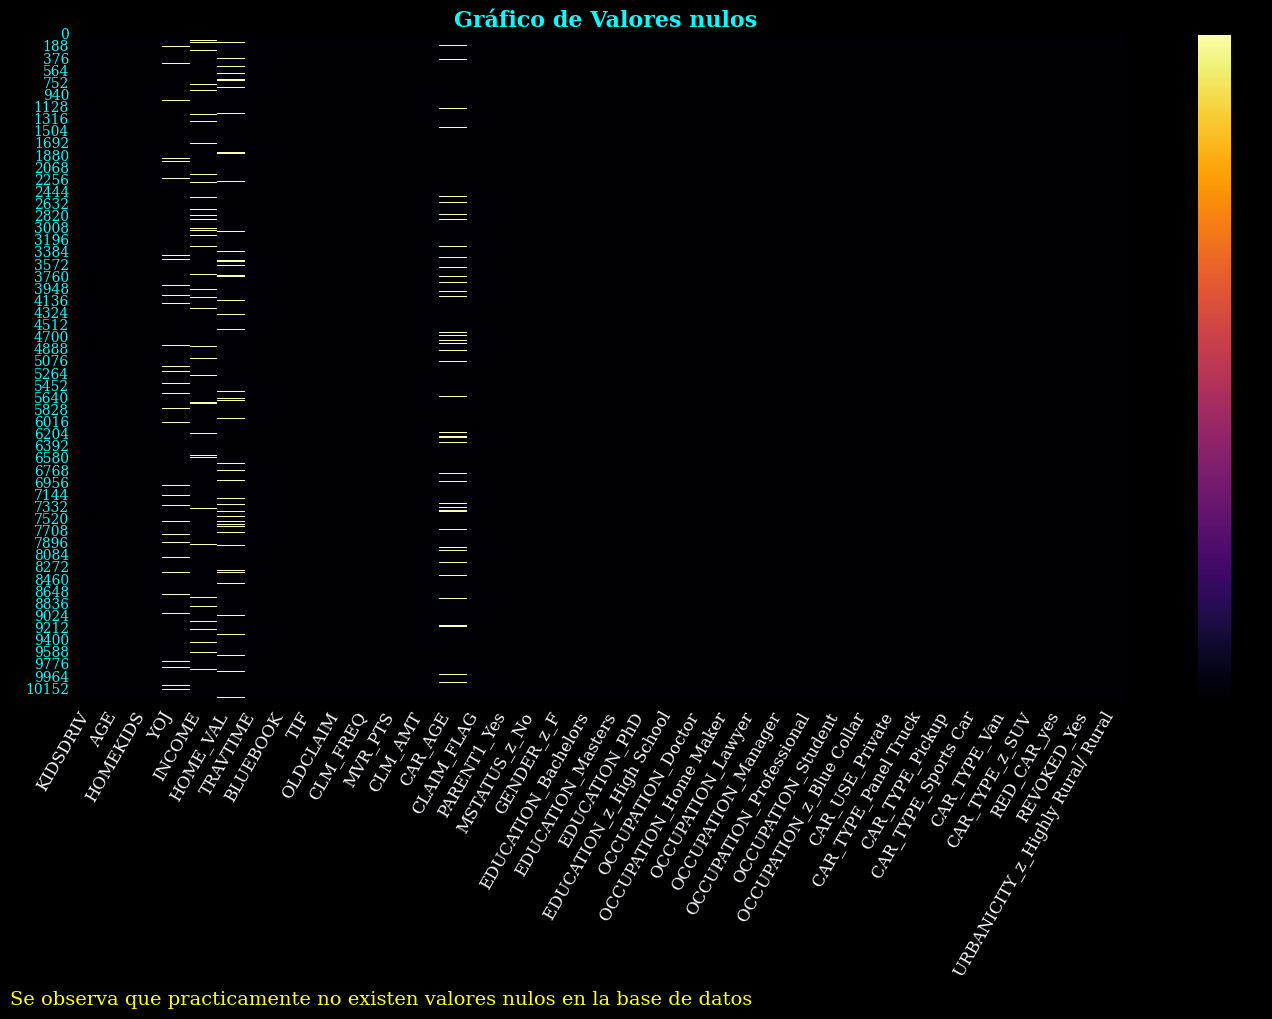

In [24]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,10), facecolor = 'black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df_entrenamiento.isnull(), cmap = 'inferno')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color ='cyan', fontweight = 'bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',rotation=60, ha='right')
plt.yticks(fontsize=10, color='cyan')
#Agregamos la interpretacion de la grafica
plt.figtext(0, -0.01, "Se observa que practicamente no existen valores nulos en la base de datos",
            fontsize = 14, color='yellow')
#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [25]:
#Veamos el porcentaje de valores nulos de las columnas

df_entrenamiento[["YOJ", 'INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_AMT' , 'BLUEBOOK', "CAR_AGE"]].isnull().mean()*100

,0
YOJ,5.319355
INCOME,5.532906
HOME_VAL,5.581440
OLDCLAIM,0.000000
CLM_AMT,0.000000
BLUEBOOK,0.000000
CAR_AGE,6.202679


In [26]:
#Debido a que tienen un porcentaje menor al 6% eliminamos los valores nulos
df_entrenamiento.dropna(subset=["YOJ", 'INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_AMT' , 'BLUEBOOK', "CAR_AGE"], inplace=True)

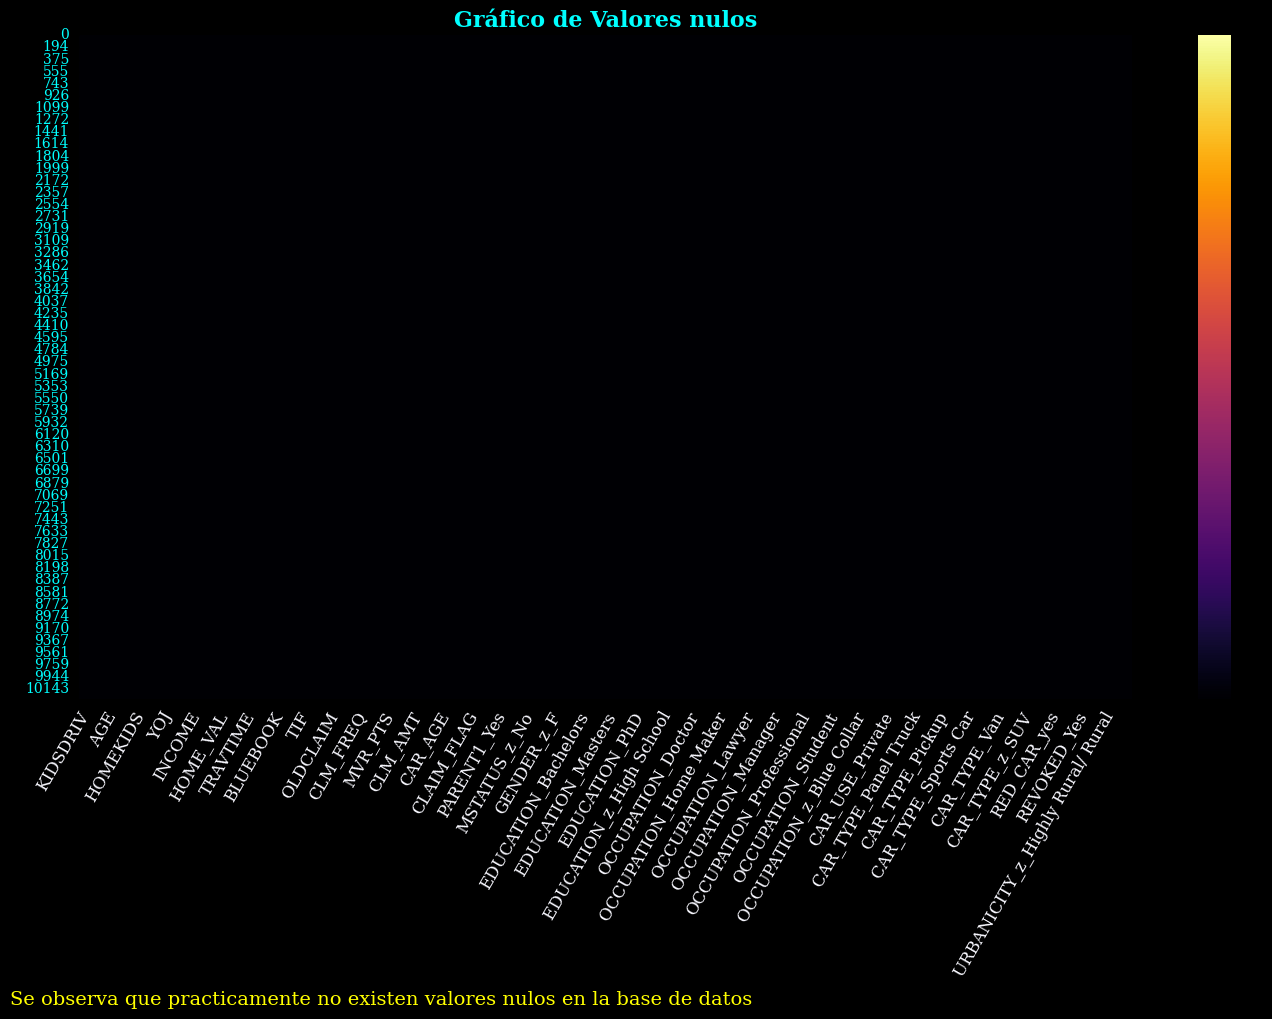

In [27]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,10), facecolor = 'black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df_entrenamiento.isnull(), cmap = 'inferno')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color ='cyan', fontweight = 'bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',rotation=60, ha='right')
plt.yticks(fontsize=10, color='cyan')
#Agregamos la interpretacion de la grafica
plt.figtext(0, -0.01, "Se observa que practicamente no existen valores nulos en la base de datos",
            fontsize = 14, color='yellow')
#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [28]:
# Ver cuántos NaNs hay por columna
print(df_entrenamiento.isna().sum())

KIDSDRIV                            0
AGE                                 4
HOMEKIDS                            0
YOJ                                 0
INCOME                              0
HOME_VAL                            0
TRAVTIME                            0
BLUEBOOK                            0
TIF                                 0
OLDCLAIM                            0
CLM_FREQ                            0
MVR_PTS                             0
CLM_AMT                             0
CAR_AGE                             0
CLAIM_FLAG                          0
PARENT1_Yes                         0
MSTATUS_z_No                        0
GENDER_z_F                          0
EDUCATION_Bachelors                 0
EDUCATION_Masters                   0
EDUCATION_PhD                       0
EDUCATION_z_High School             0
OCCUPATION_Doctor                   0
OCCUPATION_Home Maker               0
OCCUPATION_Lawyer                   0
OCCUPATION_Manager                  0
OCCUPATION_P

In [29]:
df_entrenamiento.dropna(subset=["AGE"], inplace=True)

---
## **Variables no significativas**
---

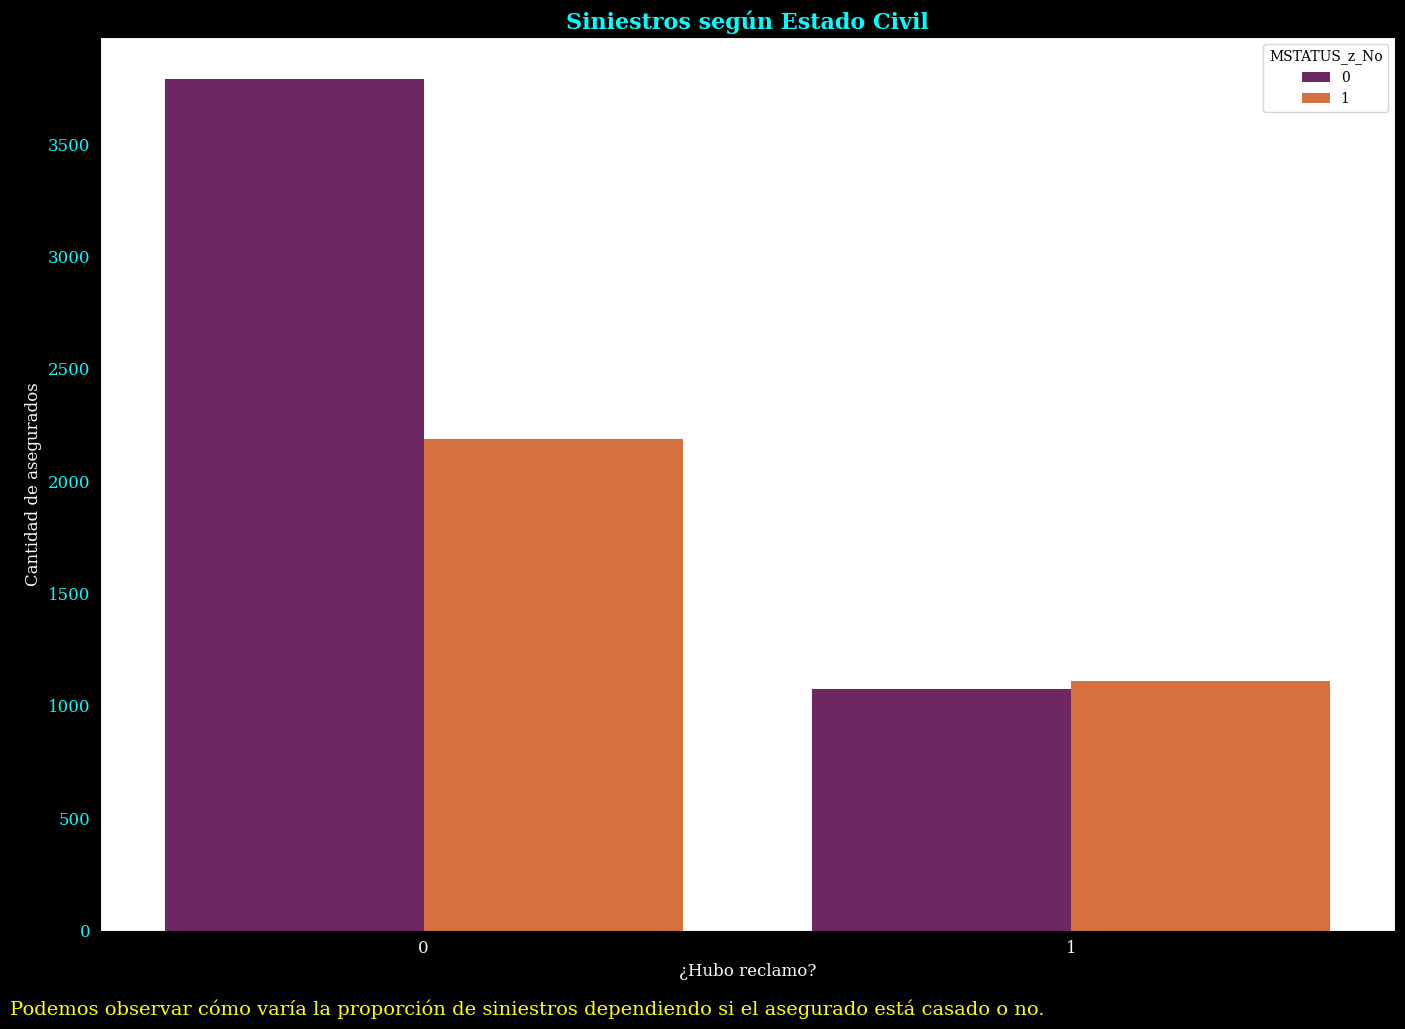

In [30]:
# Configuraciones generales
plt.figure(figsize=(14, 10), facecolor='black')  # tamaño y fondo
plt.rcParams['font.family'] = 'DejaVu Serif'  # tipo de letra

# Gráfico countplot
sns.countplot(x='CLAIM_FLAG', data=df_entrenamiento, hue='MSTATUS_z_No', palette='inferno')

# Personalización del título
plt.title('Siniestros según Estado Civil',
          fontsize=16, color='cyan', fontweight='bold')

# Ejes X y Y
plt.xlabel('¿Hubo reclamo?', fontsize=12, color='ghostwhite')
plt.ylabel('Cantidad de asegurados', fontsize=12, color='ghostwhite')

# Personalización de las etiquetas
plt.xticks(fontsize=12, color='ghostwhite', rotation=0)
plt.yticks(fontsize=12, color='cyan')

# Interpretación debajo del gráfico
plt.figtext(0, -0.02,
            "Podemos observar cómo varía la proporción de siniestros dependiendo si el asegurado está casado o no.",
            fontsize=14, color='yellow')

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

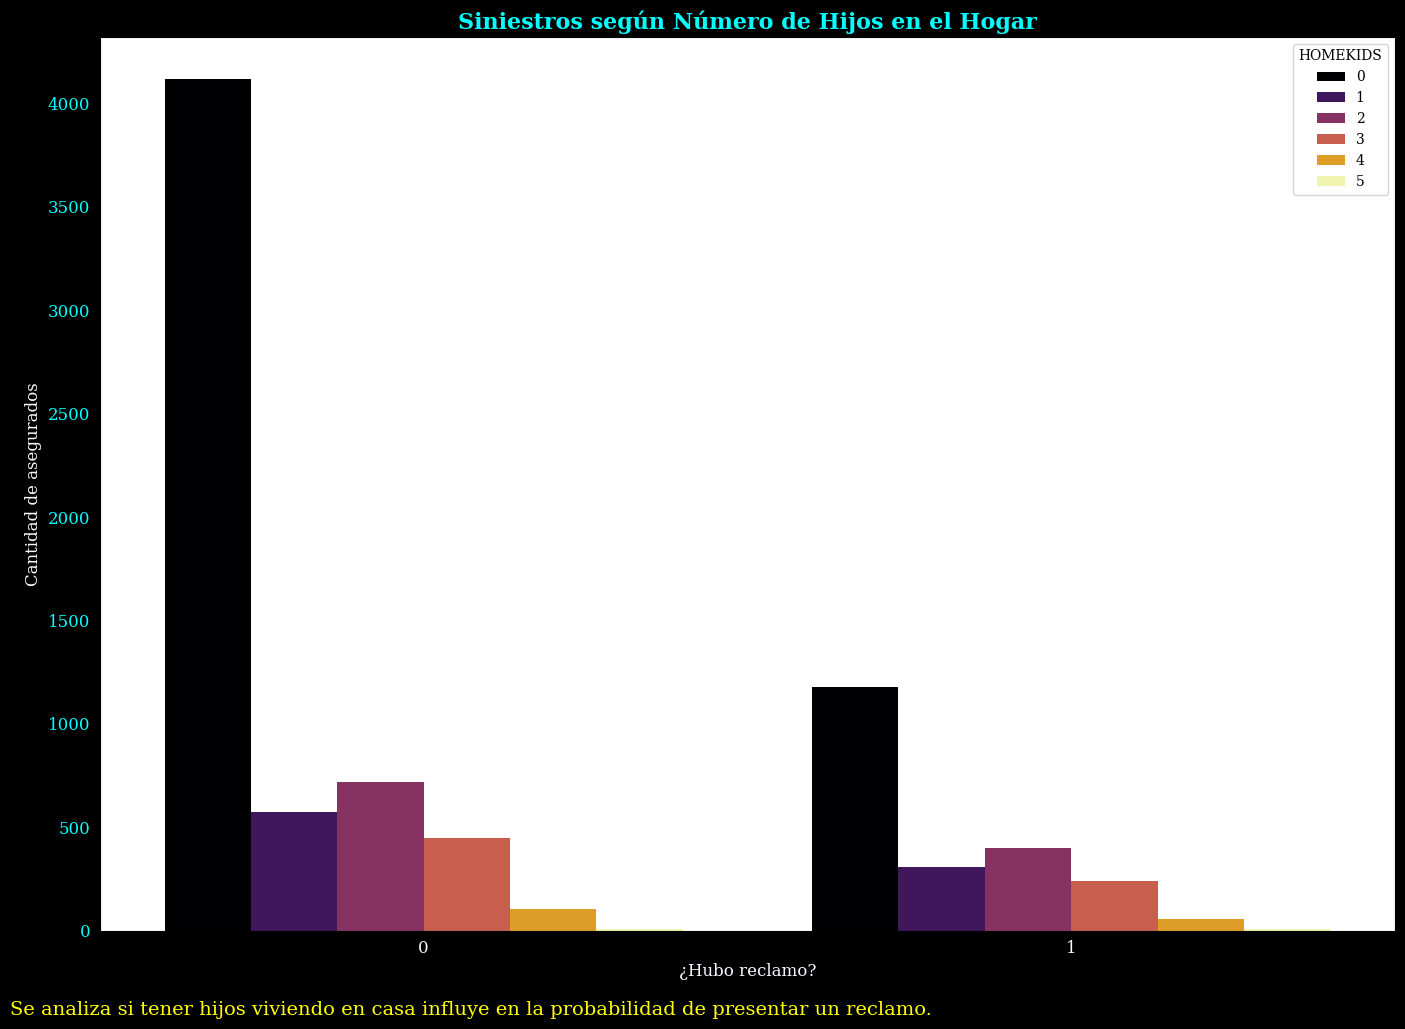

In [31]:
plt.figure(figsize=(14, 10), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Gráfico countplot
sns.countplot(x='CLAIM_FLAG', data=df_entrenamiento, hue='HOMEKIDS', palette='inferno')

# Personalización del título
plt.title('Siniestros según Número de Hijos en el Hogar',
          fontsize=16, color='cyan', fontweight='bold')

# Ejes X y Y
plt.xlabel('¿Hubo reclamo?', fontsize=12, color='ghostwhite')
plt.ylabel('Cantidad de asegurados', fontsize=12, color='ghostwhite')

# Personalización de las etiquetas
plt.xticks(fontsize=12, color='ghostwhite', rotation=0)
plt.yticks(fontsize=12, color='cyan')

# Interpretación debajo del gráfico
plt.figtext(0, -0.02,
            "Se analiza si tener hijos viviendo en casa influye en la probabilidad de presentar un reclamo.",
            fontsize=14, color='yellow')

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [32]:
df_entrenamiento.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CAR_AGE', 'CLAIM_FLAG', 'PARENT1_Yes', 'MSTATUS_z_No', 'GENDER_z_F',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_z_High School', 'OCCUPATION_Doctor', 'OCCUPATION_Home Maker',
       'OCCUPATION_Lawyer', 'OCCUPATION_Manager', 'OCCUPATION_Professional',
       'OCCUPATION_Student', 'OCCUPATION_z_Blue Collar', 'CAR_USE_Private',
       'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_Sports Car',
       'CAR_TYPE_Van', 'CAR_TYPE_z_SUV', 'RED_CAR_yes', 'REVOKED_Yes',
       'URBANICITY_z_Highly Rural/ Rural'],
      dtype='object')

---
#**g) Metodología para seleccionar variables significativas**💡
---

In [33]:
# Matriz de correlación
df_entrenamiento.corr()


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,...,OCCUPATION_z_Blue Collar,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
KIDSDRIV,1.000000,-0.070893,0.460854,0.049194,-0.041472,-0.011532,0.009195,-0.019774,-0.006084,0.021420,...,0.040618,0.004201,-0.013587,0.001943,-0.000700,-0.031683,0.025975,-0.032744,0.027265,0.035473
AGE,-0.070893,1.000000,-0.446638,0.144779,0.191496,0.215830,0.002263,0.171910,-0.000341,-0.036018,...,-0.064612,0.032109,0.057620,-0.036357,0.024100,0.033777,-0.046520,0.030747,-0.048060,-0.037275
HOMEKIDS,0.460854,-0.446638,1.000000,0.084662,-0.161008,-0.106716,-0.005178,-0.104019,0.000866,0.031142,...,0.043357,0.006009,-0.061452,-0.010503,0.043639,-0.054759,0.082255,-0.076320,0.043735,0.057190
YOJ,0.049194,0.144779,0.084662,1.000000,0.287987,0.272839,-0.018414,0.146841,0.029198,-0.001693,...,0.122947,-0.023329,0.043257,-0.003884,-0.058043,0.038169,-0.058110,0.050972,-0.010608,-0.073185
INCOME,-0.041472,0.191496,-0.161008,0.287987,1.000000,0.581959,-0.046438,0.434257,0.003059,-0.033135,...,-0.028979,-0.088338,0.221613,-0.062568,-0.102123,0.133724,-0.137236,0.065256,-0.025053,-0.206507
HOME_VAL,-0.011532,0.215830,-0.106716,0.272839,0.581959,1.000000,-0.028966,0.266800,0.000931,-0.053119,...,0.015531,-0.033623,0.134626,-0.040423,-0.061758,0.071020,-0.076632,0.026702,-0.046048,-0.113902
TRAVTIME,0.009195,0.002263,-0.005178,-0.018414,-0.046438,-0.028966,1.000000,-0.021091,-0.015652,-0.017958,...,0.026450,-0.001738,-0.017411,0.000211,0.024117,-0.017390,0.008129,-0.001562,-0.009453,0.157135
BLUEBOOK,-0.019774,0.171910,-0.104019,0.146841,0.434257,0.266800,-0.021091,1.000000,0.011872,-0.030319,...,-0.017419,-0.215606,0.476605,-0.137439,-0.152183,0.193000,-0.229942,0.019313,-0.030787,-0.097689
TIF,-0.006084,-0.000341,0.000866,0.029198,0.003059,0.000931,-0.015652,0.011872,1.000000,-0.012131,...,0.007549,-0.006678,-0.008610,0.009704,-0.007964,0.018018,0.003739,-0.002648,-0.031840,-0.009958
OLDCLAIM,0.021420,-0.036018,0.031142,-0.001693,-0.033135,-0.053119,-0.017958,-0.030319,-0.012131,1.000000,...,0.008568,-0.027890,-0.006165,-0.003574,0.054477,0.009664,-0.000084,0.003970,0.424007,-0.155184


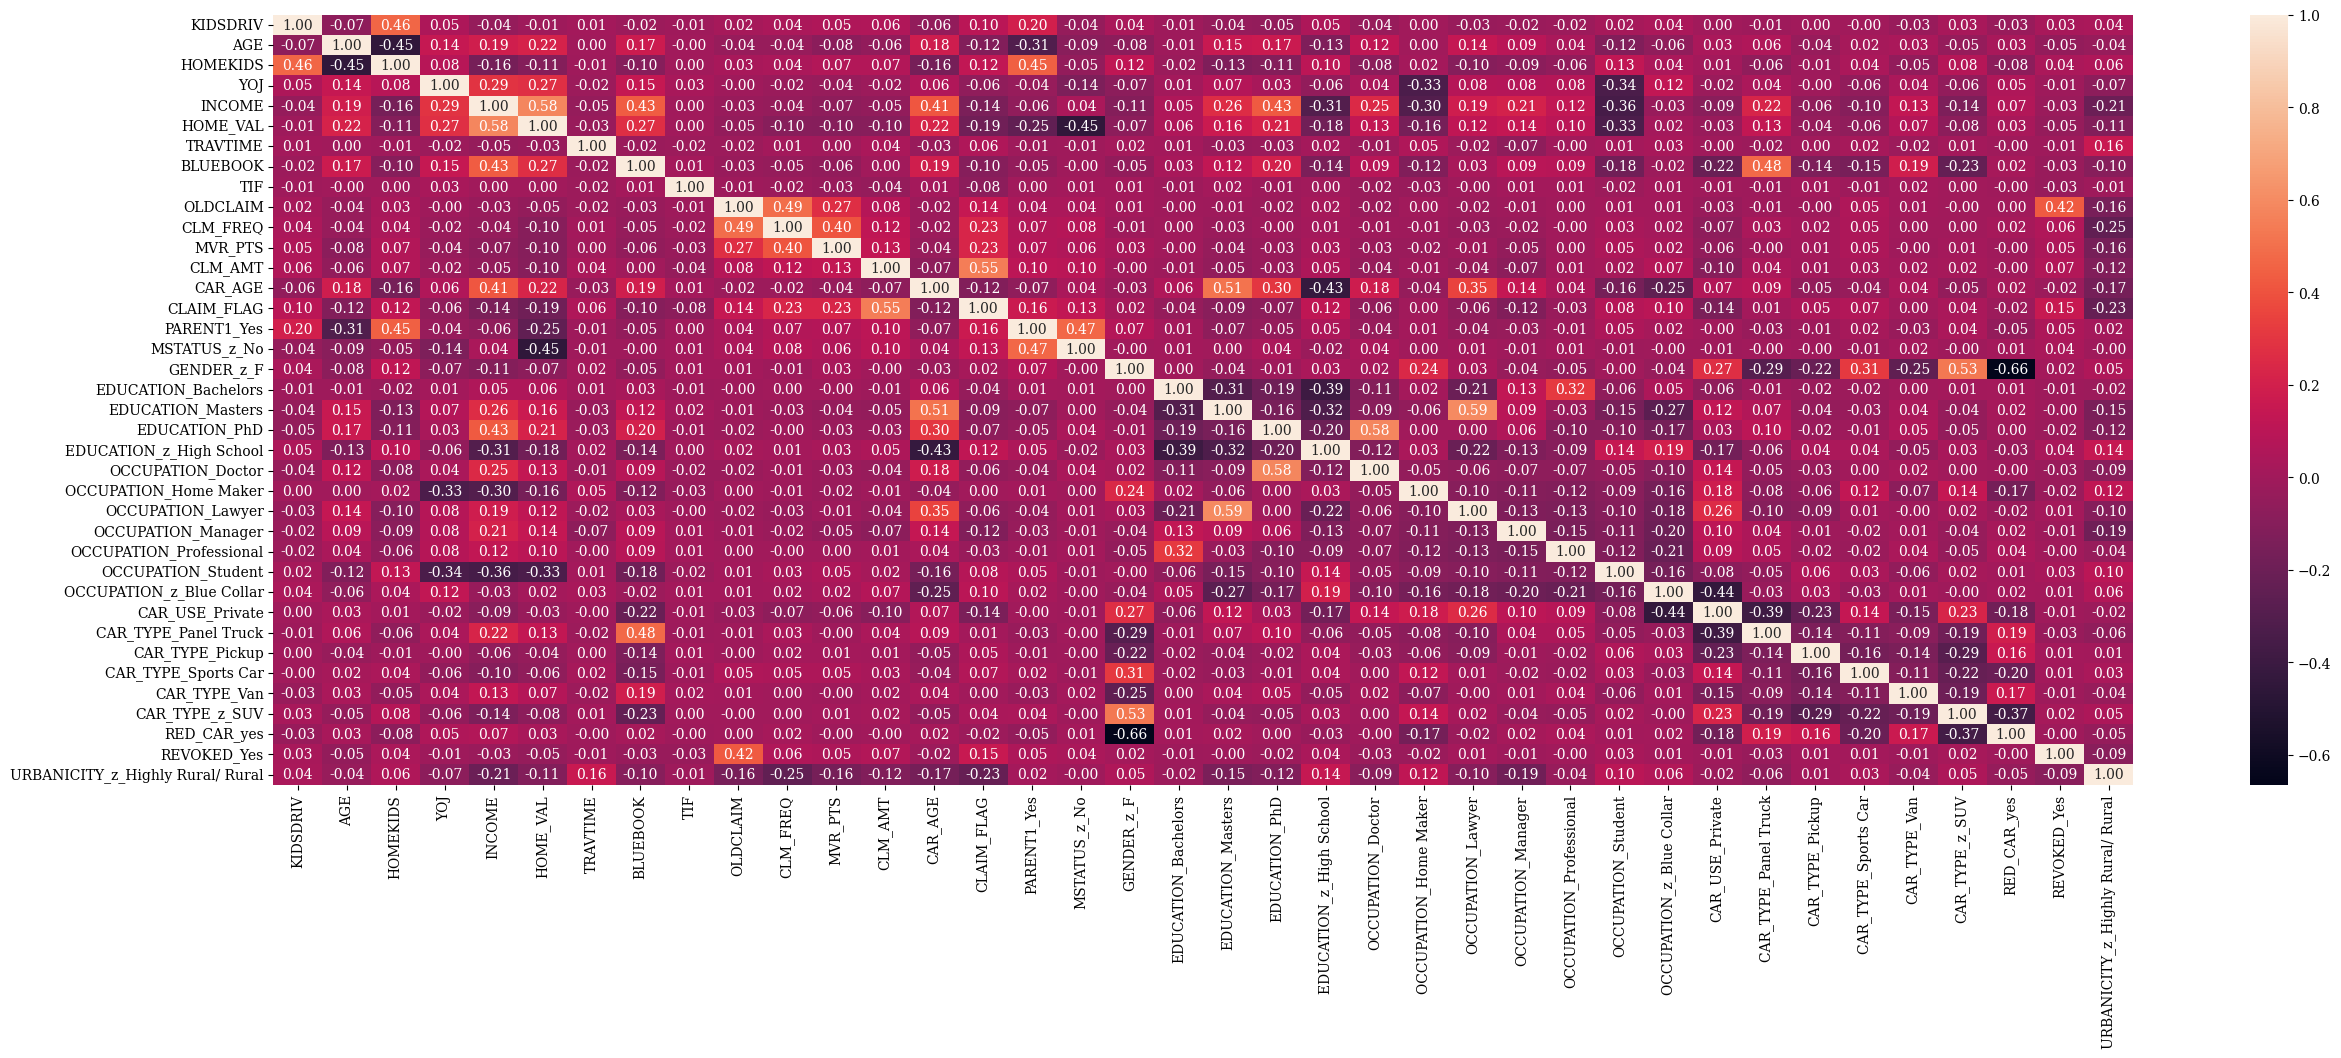

In [34]:
# Grafico de correlación
plt.figure(figsize = (30, 10))
sns.heatmap(df_entrenamiento.corr(), annot = True, fmt = ".2f")
plt.show()

In [35]:
matriz=df_entrenamiento.corr().abs()
diagonal_superior=matriz.where(np.triu(np.ones(matriz.shape), k=1).astype(bool))
var_eliminar = [column for column in diagonal_superior.columns if any(diagonal_superior[column] > 0.35)]
var_eliminar

['HOMEKIDS',
 'HOME_VAL',
 'BLUEBOOK',
 'CLM_FREQ',
 'MVR_PTS',
 'CAR_AGE',
 'CLAIM_FLAG',
 'PARENT1_Yes',
 'MSTATUS_z_No',
 'EDUCATION_Masters',
 'EDUCATION_PhD',
 'EDUCATION_z_High School',
 'OCCUPATION_Doctor',
 'OCCUPATION_Lawyer',
 'OCCUPATION_Student',
 'CAR_USE_Private',
 'CAR_TYPE_Panel Truck',
 'CAR_TYPE_z_SUV',
 'RED_CAR_yes',
 'REVOKED_Yes']

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_VIF = df_entrenamiento.drop(columns=['CLAIM_FLAG'])
df_VIF


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,...,OCCUPATION_z_Blue Collar,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0,60.0,0,11.0,67349.0,0.0,14,14230,11,4461,...,0,1,0,0,0,0,0,1,0,0
1,0,43.0,0,11.0,91449.0,257252.0,22,14940,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,48.0,0,11.0,52881.0,0.0,26,21970,1,0,...,0,1,0,0,0,1,0,1,0,0
3,0,35.0,1,10.0,16039.0,124191.0,5,4010,4,38690,...,0,1,0,0,0,0,1,0,0,0
6,0,34.0,1,12.0,125301.0,0.0,46,17430,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.0,386273.0,21,13270,15,0,...,0,1,0,0,0,0,0,0,0,0
10298,0,46.0,0,9.0,107204.0,332591.0,36,24490,6,0,...,0,0,1,0,0,0,0,0,0,0
10299,0,48.0,0,15.0,39837.0,170611.0,12,13820,7,0,...,1,1,0,0,0,0,1,0,0,0
10300,0,50.0,0,7.0,43445.0,149248.0,36,22550,6,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(df_VIF.values, i) for i in range(df_VIF.shape[1])]
vif_data

,feature,VIF
0,KIDSDRIV,1.447524
1,AGE,27.415102
2,HOMEKIDS,2.745914
3,YOJ,10.626297
4,INCOME,8.349895
5,HOME_VAL,5.859362
6,TRAVTIME,5.464829
7,BLUEBOOK,8.963893
8,TIF,2.660673
9,OLDCLAIM,2.039022


In [38]:
#Clasificamos las variables según su VIF
vif_menor_5 = vif_data[vif_data["VIF"] < 5]
vif_entre_5_10 = vif_data[(vif_data["VIF"] >= 5) & (vif_data["VIF"] <= 10)]
vif_mayor_10 = vif_data[vif_data["VIF"] > 10]

In [39]:
print("Variables con VIF < 5:")
print(vif_menor_5)

print("\nVariables con 5 <= VIF <= 10:")
print(vif_entre_5_10)

print("\nVariables con VIF > 10:")
print(vif_mayor_10)

Variables con VIF < 5:
                             feature       VIF
0                           KIDSDRIV  1.447524
2                           HOMEKIDS  2.745914
8                                TIF  2.660673
9                           OLDCLAIM  2.039022
10                          CLM_FREQ  2.370525
11                           MVR_PTS  1.997095
12                           CLM_AMT  1.199874
14                       PARENT1_Yes  2.111036
15                      MSTATUS_z_No  3.396296
17               EDUCATION_Bachelors  4.305268
19                     EDUCATION_PhD  4.055411
20           EDUCATION_z_High School  3.087982
21                 OCCUPATION_Doctor  1.811992
22             OCCUPATION_Home Maker  1.829440
23                 OCCUPATION_Lawyer  2.476838
24                OCCUPATION_Manager  1.924368
25           OCCUPATION_Professional  1.979454
26                OCCUPATION_Student  1.702370
27          OCCUPATION_z_Blue Collar  2.588985
29              CAR_TYPE_Panel Truck 

El factor de inflación de la varianza es una medida diagnóstica utilizada para cuantificar el grado de multicolinealidad entre las variables independientes de un modelo de regresión. Un VIF elevado indica que una variable está altamente correlacionada con otras variables del modelo, lo que puede inflar las varianzas de los coeficientes estimados y comprometer la estabilidad y la interpretabilidad del modelo. En este análisis, se calcularon los VIF para todas las variables predictoras. Se encontró que varias variables presentan valores de VIF entre 5 y 10, lo que indica una colinealidad moderada. No obstante, las variables AGE (VIF = 27.415) y YOJ (VIF = 10.626) exceden el umbral de 10, considerado como indicador de una multicolinealidad severa. Por esta razón, se procederá a eliminar dichas variables del modelo con el fin de mejorar su precisión y reducir la inestabilidad de los coeficientes.

In [40]:
# Eliminamos las variables
columnas_a_eliminar = ['AGE', 'YOJ', 'BLUEBOOK', 'INCOME', 'CAR_AGE','GENDER_z_F', 'HOME_VAL', 'TRAVTIME', 'EDUCATION_Masters', 'CAR_USE_Private','HOMEKIDS',
                      'OLDCLAIM','CLM_FREQ','CLM_AMT','EDUCATION_Bachelors',
                       'EDUCATION_PhD','EDUCATION_z_High School']
df_entrenamiento = df_entrenamiento.drop(columnas_a_eliminar, axis=1)
df_entrenamiento

,KIDSDRIV,TIF,MVR_PTS,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,...,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0,11,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,2,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,15,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10298,0,6,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10299,0,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10300,0,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Eliminamos las variables
#columnas_a_eliminar = ['AGE', 'YOJ', 'BLUEBOOK', 'INCOME', 'CAR_AGE','GENDER_z_F', 'HOME_VAL', 'TRAVTIME','HOMEKIDS',
#                     'OLDCLAIM', 'CAR_USE_Private','EDUCATION_Masters','EDUCATION_Bachelors',
#                       'EDUCATION_PhD','EDUCATION_z_High School','REVOKED_Yes','MVR_PTS', 'MSTATUS_z_No',
#                       'OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
#                       'OCCUPATION_Professional','OCCUPATION_Student','OCCUPATION_z_Blue Collar',
#                        'CLM_FREQ','CLM_AMT'
#                       ]
#df_entrenamiento = df_entrenamiento.drop(columnas_a_eliminar, axis=1)
#df_entrenamiento

In [42]:
df_entrenamiento = df_entrenamiento.astype(float)

In [43]:
df_entrenamiento

,KIDSDRIV,TIF,MVR_PTS,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,...,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0.0,11.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10298,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10299,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10300,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


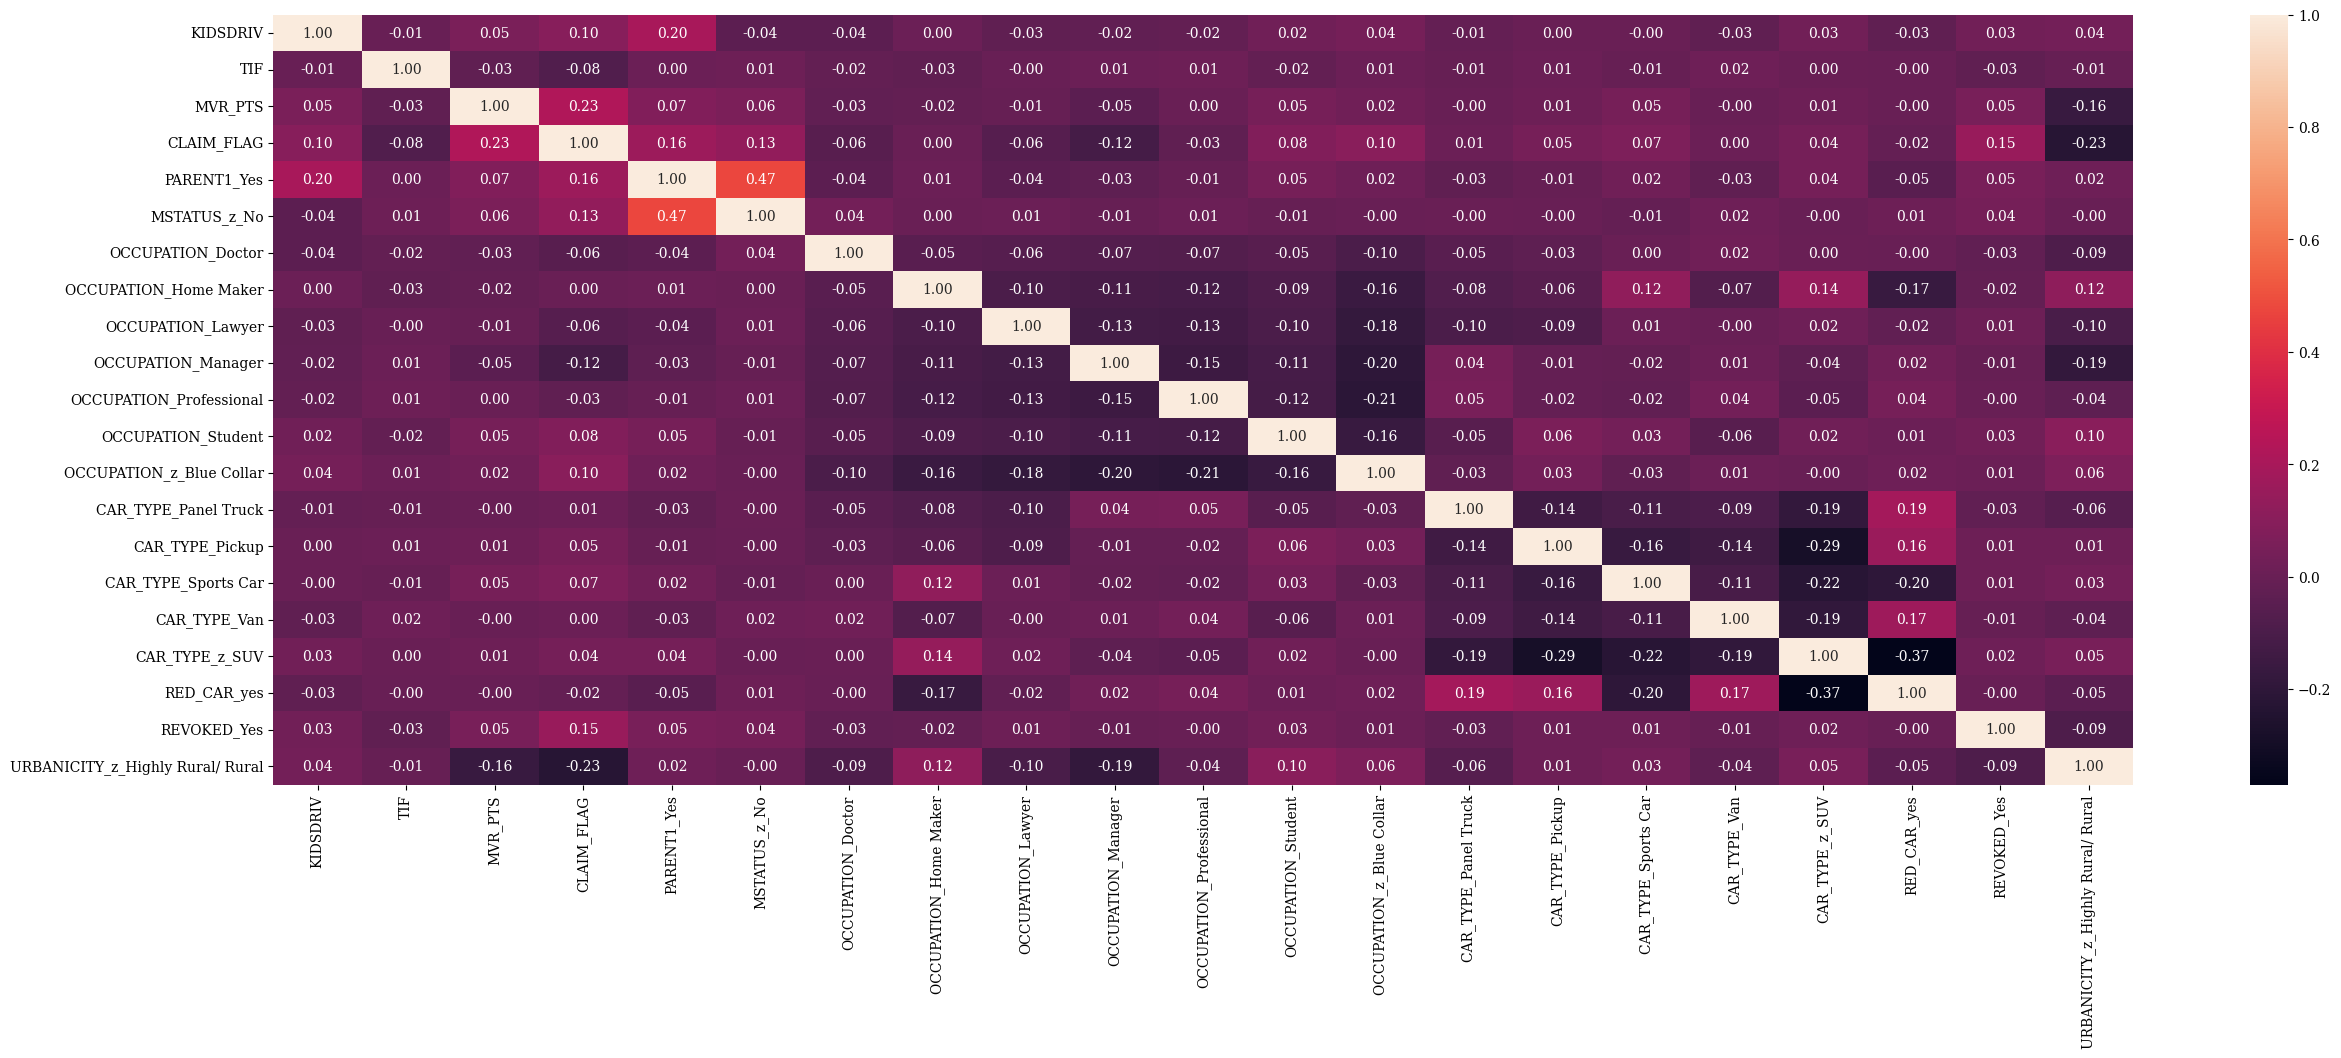

In [44]:
# Grafico de correlación
plt.figure(figsize = (30, 10))
sns.heatmap(df_entrenamiento.corr(), annot = True, fmt = ".2f")
plt.show()

## Oversampling

In [45]:
X = df_entrenamiento.loc[:, df_entrenamiento.columns != "CLAIM_FLAG"]
Y = df_entrenamiento["CLAIM_FLAG"]

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [46]:
print(X.shape, Y.shape)

(8163, 20) (8163,)


In [47]:
print(X_train.shape, Y_train.shape)

(5714, 20) (5714,)


In [48]:
os_data_X, os_data_Y = os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_Y = pd.DataFrame(data = os_data_Y, columns = ["CLAIM_FLAG"])

In [49]:
os_data_X.shape

(8358, 20)

In [50]:
df_entrenamiento.shape

(8163, 21)

In [51]:
os_data_Y.value_counts()

,count
CLAIM_FLAG,
0.0,4179
1.0,4179


In [52]:
df_entrenamiento_variables = df_entrenamiento.columns.values.tolist()
Y = ["CLAIM_FLAG"]
X = [i for i in df_entrenamiento_variables if i not in Y]

In [53]:
print(Y, X)

['CLAIM_FLAG'] ['KIDSDRIV', 'TIF', 'MVR_PTS', 'PARENT1_Yes', 'MSTATUS_z_No', 'OCCUPATION_Doctor', 'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager', 'OCCUPATION_Professional', 'OCCUPATION_Student', 'OCCUPATION_z_Blue Collar', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV', 'RED_CAR_yes', 'REVOKED_Yes', 'URBANICITY_z_Highly Rural/ Rural']


In [54]:
X = os_data_X
Y = os_data_Y

In [55]:
import statsmodels.api as sm

In [56]:
# Esta parte se tiene que hacer??
X_m = sm.add_constant(X)

In [57]:
X_m.corr()

,const,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,...,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KIDSDRIV,NaN,1.000000,-0.022228,0.063389,0.231743,-0.023154,-0.029733,0.005063,-0.018655,-0.009557,...,0.007739,0.007778,-0.012408,-0.022990,-0.006938,-0.053148,0.062330,-0.075512,0.035939,0.025347
TIF,NaN,-0.022228,1.000000,-0.034291,-0.010999,0.014728,-0.010921,-0.036680,0.017456,0.008627,...,-0.036542,0.005111,-0.010502,-0.009625,-0.006817,0.012318,0.021591,-0.006470,-0.037539,0.007811
MVR_PTS,NaN,0.063389,-0.034291,1.000000,0.076360,0.050544,-0.024827,-0.033283,-0.037636,-0.067722,...,0.039673,0.064152,-0.002643,0.034285,0.022021,-0.014369,0.010279,0.017503,0.038526,-0.154634
PARENT1_Yes,NaN,0.231743,-0.010999,0.076360,1.000000,0.504630,-0.032204,0.000500,-0.042843,-0.034461,...,0.040118,0.006000,-0.026038,-0.033194,0.020670,-0.053214,0.051315,-0.062917,0.031405,-0.018546
MSTATUS_z_No,NaN,-0.023154,0.014728,0.050544,0.504630,1.000000,0.039319,-0.007269,0.003136,-0.014463,...,-0.027143,0.016692,0.010627,-0.007004,-0.019305,0.009276,-0.014930,0.026514,0.048037,-0.033244
OCCUPATION_Doctor,NaN,-0.029733,-0.010921,-0.024827,-0.032204,0.039319,1.000000,-0.044885,-0.051460,-0.054598,...,-0.051174,-0.093066,-0.047022,-0.036036,0.008061,0.009037,-0.008467,-0.000819,-0.026202,-0.068008
OCCUPATION_Home Maker,NaN,0.005063,-0.036680,-0.033283,0.000500,-0.007269,-0.044885,1.000000,-0.094579,-0.100097,...,-0.094531,-0.173399,-0.074544,-0.071717,0.135487,-0.090220,0.145597,-0.172065,-0.031540,0.085357
OCCUPATION_Lawyer,NaN,-0.018655,0.017456,-0.037636,-0.042843,0.003136,-0.051460,-0.094579,1.000000,-0.110055,...,-0.101177,-0.188538,-0.094608,-0.081778,0.030013,-0.008756,0.021423,-0.033857,0.002325,-0.078289
OCCUPATION_Manager,NaN,-0.009557,0.008627,-0.067722,-0.034461,-0.014463,-0.054598,-0.100097,-0.110055,1.000000,...,-0.108830,-0.200089,0.032750,-0.022261,-0.018024,0.001886,-0.025104,0.003134,-0.014748,-0.143709


In [58]:
log_reg = sm.Logit(Y, X_m).fit()

Optimization terminated successfully.
         Current function value: 0.541523
         Iterations 6


In [59]:
print(log_reg.summary2())

                                 Results: Logit
Model:                     Logit                 Method:                MLE      
Dependent Variable:        CLAIM_FLAG            Pseudo R-squared:      0.219    
Date:                      2025-04-27 16:38      AIC:                   9094.0942
No. Observations:          8358                  BIC:                   9241.7446
Df Model:                  20                    Log-Likelihood:        -4526.0  
Df Residuals:              8337                  LL-Null:               -5793.3  
Converged:                 1.0000                LLR p-value:           0.0000   
No. Iterations:            6.0000                Scale:                 1.0000   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                            -0.2976   0.0952 

##**Modelo**

In [60]:
#Variables categóricas
#Y = df_entrenamiento['CLAIM_FLAG']
#X = df_entrenamiento.drop(['CLAIM_FLAG'], axis = 1)

In [61]:
X.head()

,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 45)

In [63]:
X_train

,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
710,0.0,10.0,4.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
8064,0.0,13.0,3.342458,0.0,0.000000,0.0,0.000000,0.342458,0.0,0.0,0.0,0.657542,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.342458,0.0
8259,1.0,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.847457,0.0,0.000000,0.0,0.152543,0.847457,0.000000,0.0
7580,0.0,6.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0
5084,0.0,4.0,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,0.0,10.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0
163,0.0,7.0,6.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
6012,0.0,4.0,4.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.294181,0.0
6558,0.0,13.0,6.798995,0.0,0.798995,0.0,0.201005,0.000000,0.0,0.0,0.0,0.798995,0.000000,0.0,0.000000,0.0,1.000000,0.201005,0.000000,0.0


In [64]:
X_train.shape

(5850, 20)

In [65]:
X_test

,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
3845,0.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0
7156,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.611411,0.0,0.0,0.0,0.0,0.000000,0.0,0.388589,0.0,1.0,0.0,0.0
2312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1026,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,1.0
3852,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2257,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1962,0.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5766,0.0,6.0,6.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.230953,0.0,0.769047,0.0,1.0,0.0,0.0


In [66]:
X_test.shape

(2508, 20)

In [67]:
Y_test

,CLAIM_FLAG
3845,1.0
7156,1.0
2312,1.0
1026,0.0
3852,0.0
...,...
547,0.0
2257,1.0
1962,0.0
5766,1.0


In [68]:
Y_train

,CLAIM_FLAG
710,0.0
8064,1.0
8259,1.0
7580,1.0
5084,1.0
...,...
3704,0.0
163,0.0
6012,1.0
6558,1.0


In [69]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
predicciones = model.predict(X_test)
predicciones

array([1., 0., 1., ..., 0., 1., 0.])

In [71]:
model.predict_proba(X_test)[:,1]

array([0.65418575, 0.33131682, 0.58242326, ..., 0.47664771, 0.6524558 ,
       0.17359944])

In [72]:
predicciones.shape

(2508,)

In [73]:
Y_test

,CLAIM_FLAG
3845,1.0
7156,1.0
2312,1.0
1026,0.0
3852,0.0
...,...
547,0.0
2257,1.0
1962,0.0
5766,1.0


In [74]:
Y_test.shape

(2508, 1)

In [75]:
df_entrenamiento.shape

(8163, 21)

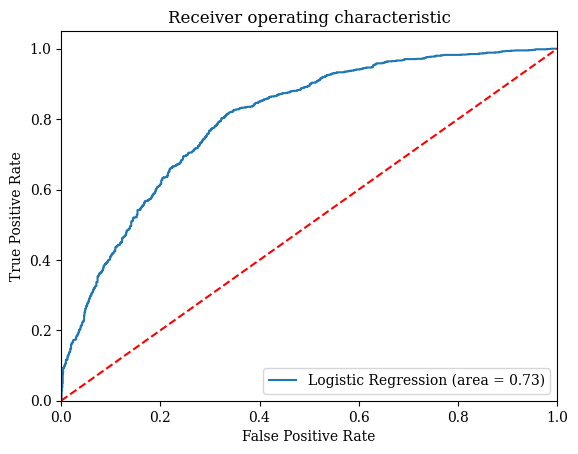

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))

fpr_lr, tpr_lr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

In [77]:
fpr_lr

array([0.        , 0.        , 0.        , ..., 0.98644338, 0.98724083,
       1.        ])

## **Métricas del modelo**

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      1254
         1.0       0.71      0.78      0.75      1254

    accuracy                           0.73      2508
   macro avg       0.74      0.73      0.73      2508
weighted avg       0.74      0.73      0.73      2508



## **Matriz de confusión**

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predicciones)

array([[863, 391],
       [275, 979]])

## **Regresión logística con Statmodels**

In [81]:
import statsmodels.api as sm
import pandas as pd
Y_test.head()

,CLAIM_FLAG
3845,1.0
7156,1.0
2312,1.0
1026,0.0
3852,0.0


In [82]:
X_test.head()

,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
3845,0.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0
7156,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.611411,0.0,0.0,0.0,0.0,0.0,0.0,0.388589,0.0,1.0,0.0,0.0
2312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
1026,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0
3852,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 3845 to 2507
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          2508 non-null   float64
 1   TIF                               2508 non-null   float64
 2   MVR_PTS                           2508 non-null   float64
 3   PARENT1_Yes                       2508 non-null   float64
 4   MSTATUS_z_No                      2508 non-null   float64
 5   OCCUPATION_Doctor                 2508 non-null   float64
 6   OCCUPATION_Home Maker             2508 non-null   float64
 7   OCCUPATION_Lawyer                 2508 non-null   float64
 8   OCCUPATION_Manager                2508 non-null   float64
 9   OCCUPATION_Professional           2508 non-null   float64
 10  OCCUPATION_Student                2508 non-null   float64
 11  OCCUPATION_z_Blue Collar          2508 non-null   float64
 12  CAR_TYPE

In [84]:
(X_train.nunique() == 1)

,0
KIDSDRIV,False
TIF,False
MVR_PTS,False
PARENT1_Yes,False
MSTATUS_z_No,False
OCCUPATION_Doctor,False
OCCUPATION_Home Maker,False
OCCUPATION_Lawyer,False
OCCUPATION_Manager,False
OCCUPATION_Professional,False


In [85]:
# Eliminar columnas constantes (donde la varianza es 0)
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # Elimina columnas constantes
X_train = pd.DataFrame(selector.fit_transform(X_train), columns=X_train.columns[selector.get_support()])
# Eliminar columnas duplicadas
X_train = X_train.loc[:, ~X_train.T.duplicated()]
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

In [86]:
X_train

,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,0.0,10.0,4.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
1,0.0,13.0,3.342458,0.0,0.000000,0.0,0.000000,0.342458,0.0,0.0,0.0,0.657542,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.342458,0.0
2,1.0,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.847457,0.0,0.000000,0.0,0.152543,0.847457,0.000000,0.0
3,0.0,6.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0
4,0.0,4.0,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,0.0,10.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0
5846,0.0,7.0,6.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5847,0.0,4.0,4.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.294181,0.0
5848,0.0,13.0,6.798995,0.0,0.798995,0.0,0.201005,0.000000,0.0,0.0,0.0,0.798995,0.000000,0.0,0.000000,0.0,1.000000,0.201005,0.000000,0.0


In [87]:
X_train = sm.add_constant(X_train, has_constant='add')
X_train

,const,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,...,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,1.0,0.0,10.0,4.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
1,1.0,0.0,13.0,3.342458,0.0,0.000000,0.0,0.000000,0.342458,0.0,...,0.0,0.657542,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.342458,0.0
2,1.0,1.0,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.847457,0.0,0.000000,0.0,0.152543,0.847457,0.000000,0.0
3,1.0,0.0,6.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0
4,1.0,0.0,4.0,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.0,...,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,1.0,0.0,10.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,...,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0
5846,1.0,0.0,7.0,6.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5847,1.0,0.0,4.0,4.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.294181,0.0
5848,1.0,0.0,13.0,6.798995,0.0,0.798995,0.0,0.201005,0.000000,0.0,...,0.0,0.798995,0.000000,0.0,0.000000,0.0,1.000000,0.201005,0.000000,0.0


In [88]:
log_reg = sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.542155
         Iterations 6


In [89]:
X_train

,const,KIDSDRIV,TIF,MVR_PTS,PARENT1_Yes,MSTATUS_z_No,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,...,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural
0,1.0,0.0,10.0,4.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
1,1.0,0.0,13.0,3.342458,0.0,0.000000,0.0,0.000000,0.342458,0.0,...,0.0,0.657542,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.342458,0.0
2,1.0,1.0,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.847457,0.0,0.000000,0.0,0.152543,0.847457,0.000000,0.0
3,1.0,0.0,6.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0
4,1.0,0.0,4.0,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.0,...,1.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,1.0,0.0,10.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,...,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.0
5846,1.0,0.0,7.0,6.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5847,1.0,0.0,4.0,4.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.294181,0.0
5848,1.0,0.0,13.0,6.798995,0.0,0.798995,0.0,0.201005,0.000000,0.0,...,0.0,0.798995,0.000000,0.0,0.000000,0.0,1.000000,0.201005,0.000000,0.0


In [90]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:             CLAIM_FLAG   No. Observations:                 5850
Model:                          Logit   Df Residuals:                     5829
Method:                           MLE   Df Model:                           20
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                  0.2178
Time:                        16:38:07   Log-Likelihood:                -3171.6
converged:                       True   LL-Null:                       -4054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2451      0.113     -2.177      0.029      -0.466      -0.024
KIDSDRIV                             0.3034      0.064      4.764

In [91]:
Y_hat = log_reg.predict(X_m)

In [92]:
prediction = list(map(round, Y_hat))

In [93]:
print(Y_test.shape)
print(Y_hat.shape)

(2508, 1)
(8358,)


In [94]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)

In [95]:
# confusion matrix
cm = confusion_matrix(Y_test, predicciones)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[863 391]
 [275 979]]


In [96]:
confusion_matrix(Y_test,predicciones)

array([[863, 391],
       [275, 979]])

<Axes: >

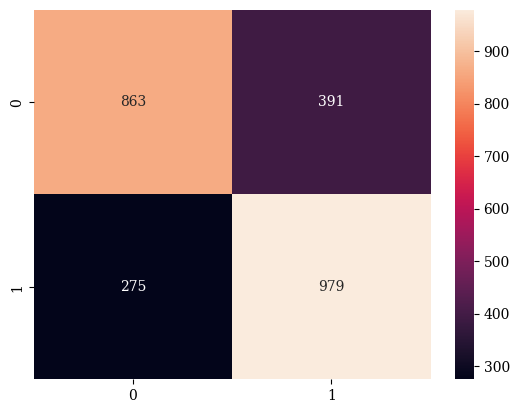

In [97]:
sns.heatmap(cm, annot=True, fmt='g')

In [98]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, predicciones))

Test accuracy =  0.7344497607655502


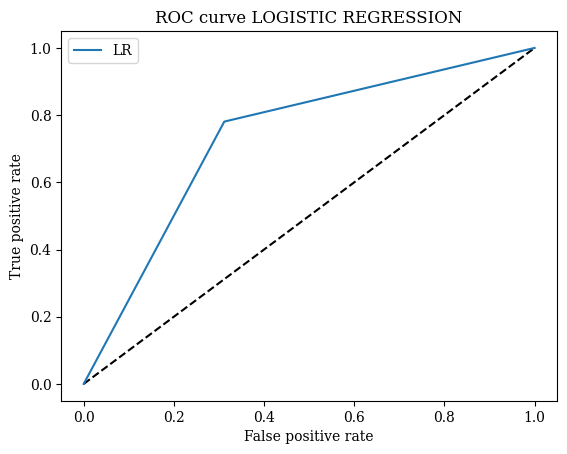

In [99]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, predicciones)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LOGISTIC REGRESSION')
plt.legend(loc='best')
plt.show()

In [100]:
fpr_lr

array([0.        , 0.31180223, 1.        ])

---
#**h) Tabla de resultados**📈
---

---
# **i) Métricas del modelo, Matriz de confusión y Curva ROC**🕵️
---

---
#**j) Supuestos de la regresión**👨‍💻
---

---
#**Hipótesis para los supuestos**🧠
---

---
# **Conclusiones**: 📌
---